# 1.数据读取（理解数据结构）

In [3]:
print("hello world")

hello world


In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 读取数据
df = pd.read_csv('mental_health_dataset.csv')

# 显示数据基本信息
print('数据集基本信息：')
print(df.info())
print('\n数据集前5行：')
print(df.head())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), objec

## 2. 探索性数据分析EDA（初步洞察变量表现与关联性）

### 2.1 缺失值与异常值统计

#### 2.1.1 缺失值分析

缺失值统计：
Empty DataFrame
Columns: [缺失值数量, 缺失值比例]
Index: []


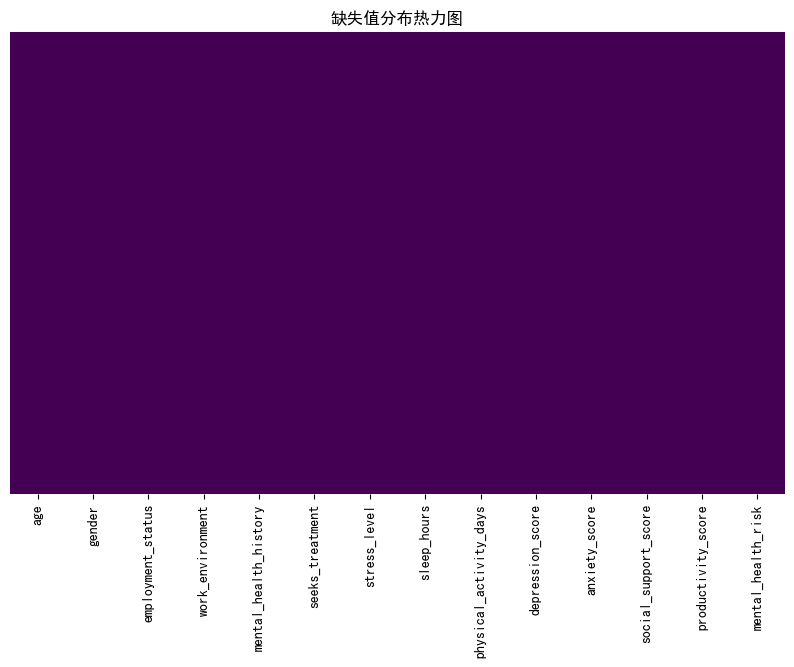

In [6]:
# 统计每个列的缺失值数量和比例
missing_stats = pd.DataFrame({
    '缺失值数量': df.isnull().sum(),
    '缺失值比例': df.isnull().sum() / len(df) * 100
})

# 按缺失值数量降序排序
missing_stats = missing_stats.sort_values('缺失值数量', ascending=False)

# 只显示有缺失值的列
print('缺失值统计：')
print(missing_stats[missing_stats['缺失值数量'] > 0])

# 绘制缺失值热力图
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('缺失值分布热力图')
plt.show()

#### 2.1.2 异常值分析

数值型变量的基本统计量：
                age  stress_level   sleep_hours  physical_activity_days  \
count  10000.000000  10000.000000  10000.000000            10000.000000   
mean      41.557600      5.572000      6.473000                3.505700   
std       13.749581      2.887741      1.473944                2.282737   
min       18.000000      1.000000      3.000000                0.000000   
25%       30.000000      3.000000      5.500000                2.000000   
50%       41.500000      6.000000      6.500000                4.000000   
75%       53.000000      8.000000      7.500000                5.000000   
max       65.000000     10.000000     10.000000                7.000000   

       depression_score  anxiety_score  social_support_score  \
count      10000.000000    10000.00000          10000.000000   
mean          15.039900       10.56180             50.117700   
std            8.990839        6.32264             29.229278   
min            0.000000        0.00000              0.0

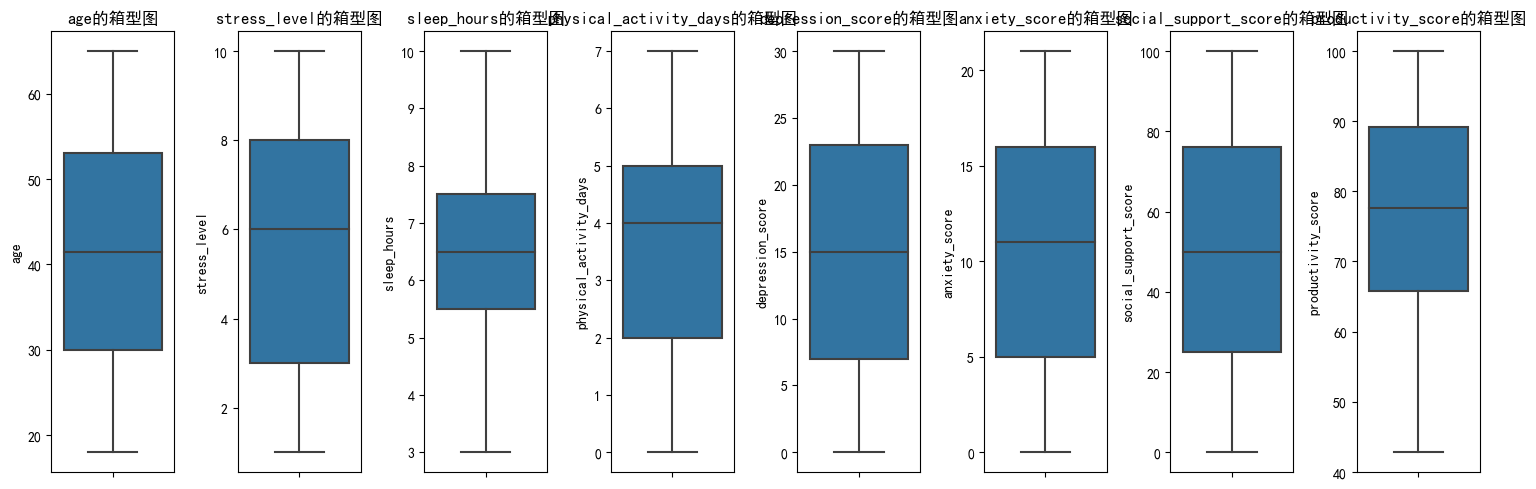


异常值统计：

age:
异常值数量: 0
下界: -4.50
上界: 87.50

stress_level:
异常值数量: 0
下界: -4.50
上界: 15.50

sleep_hours:
异常值数量: 0
下界: 2.50
上界: 10.50

physical_activity_days:
异常值数量: 0
下界: -2.50
上界: 9.50

depression_score:
异常值数量: 0
下界: -17.00
上界: 47.00

anxiety_score:
异常值数量: 0
下界: -11.50
上界: 32.50

social_support_score:
异常值数量: 0
下界: -51.50
上界: 152.50

productivity_score:
异常值数量: 0
下界: 30.70
上界: 124.30


In [7]:
# 获取数值型列
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 计算基本统计量
print('数值型变量的基本统计量：')
print(df[numeric_columns].describe())

# 使用箱型图检测异常值
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'{column}的箱型图')
plt.tight_layout()
plt.show()

# 计算异常值
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# 输出每个数值列的异常值统计
print('\n异常值统计：')
for column in numeric_columns:
    n_outliers, lower, upper = detect_outliers(df, column)
    print(f'\n{column}:')
    print(f'异常值数量: {n_outliers}')
    print(f'下界: {lower:.2f}')
    print(f'上界: {upper:.2f}')

### 2.2 类别变量分布图

#### 2.2.1 目标变量分析：

- **心理健康风险**
  - 注意事项：如果某一类 <10%，极易导致模型忽略该类 → 需要重采样！

Mental Health Risk Distribution:
        Count  Percentage(%)
Medium   5892          58.92
High     2369          23.69
Low      1739          17.39


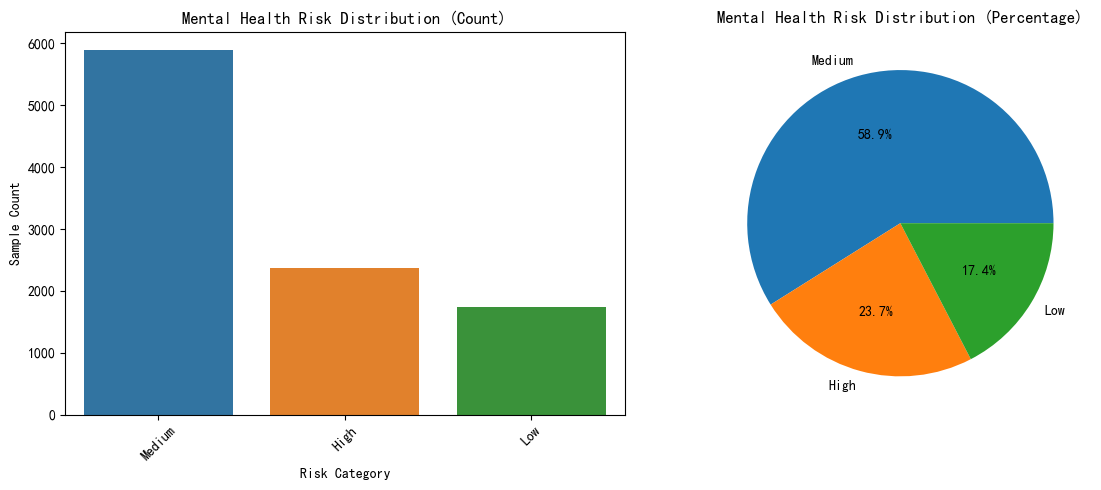

In [11]:
# 分析心理健康风险分类分布
# 计算每个类别的数量和比例
risk_distribution = df['mental_health_risk'].value_counts()
risk_percentage = df['mental_health_risk'].value_counts(normalize=True) * 100

# 创建一个显示分布情况的数据框
risk_stats = pd.DataFrame({
    'Count': risk_distribution,
    'Percentage(%)': risk_percentage
})

# 打印分布统计
print('Mental Health Risk Distribution:')
print(risk_stats)

# 创建图形
plt.figure(figsize=(12, 5))

# 子图1：条形图
plt.subplot(1, 2, 1)
sns.barplot(x=risk_distribution.index, y=risk_distribution.values)
plt.title('Mental Health Risk Distribution (Count)')
plt.xlabel('Risk Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)

# 子图2：饼图
plt.subplot(1, 2, 2)
plt.pie(risk_percentage, labels=risk_percentage.index, autopct='%1.1f%%')
plt.title('Mental Health Risk Distribution (Percentage)')

plt.tight_layout()
plt.show()

# 检查是否存在类别不平衡（小于10%的类别）
imbalanced_classes = risk_percentage[risk_percentage < 10]
if not imbalanced_classes.empty:
    print('\nWarning: The following categories have less than 10% samples and may need resampling:')
    print(imbalanced_classes)


#### 2.2.2 输入变量分析：

- **性别**
  - 关注重点：女性占比是否远大于男性（性别偏倚）

- **就业状况**
  - 关注重点：检查"学生/自由职业者"是否极度稀缺

- **工作环境**
  - 关注重点：观察"有病史"和"无病史"的占比是否不均

- **精神病史**
  - 关注重点：是否接受治疗的样本是否均衡

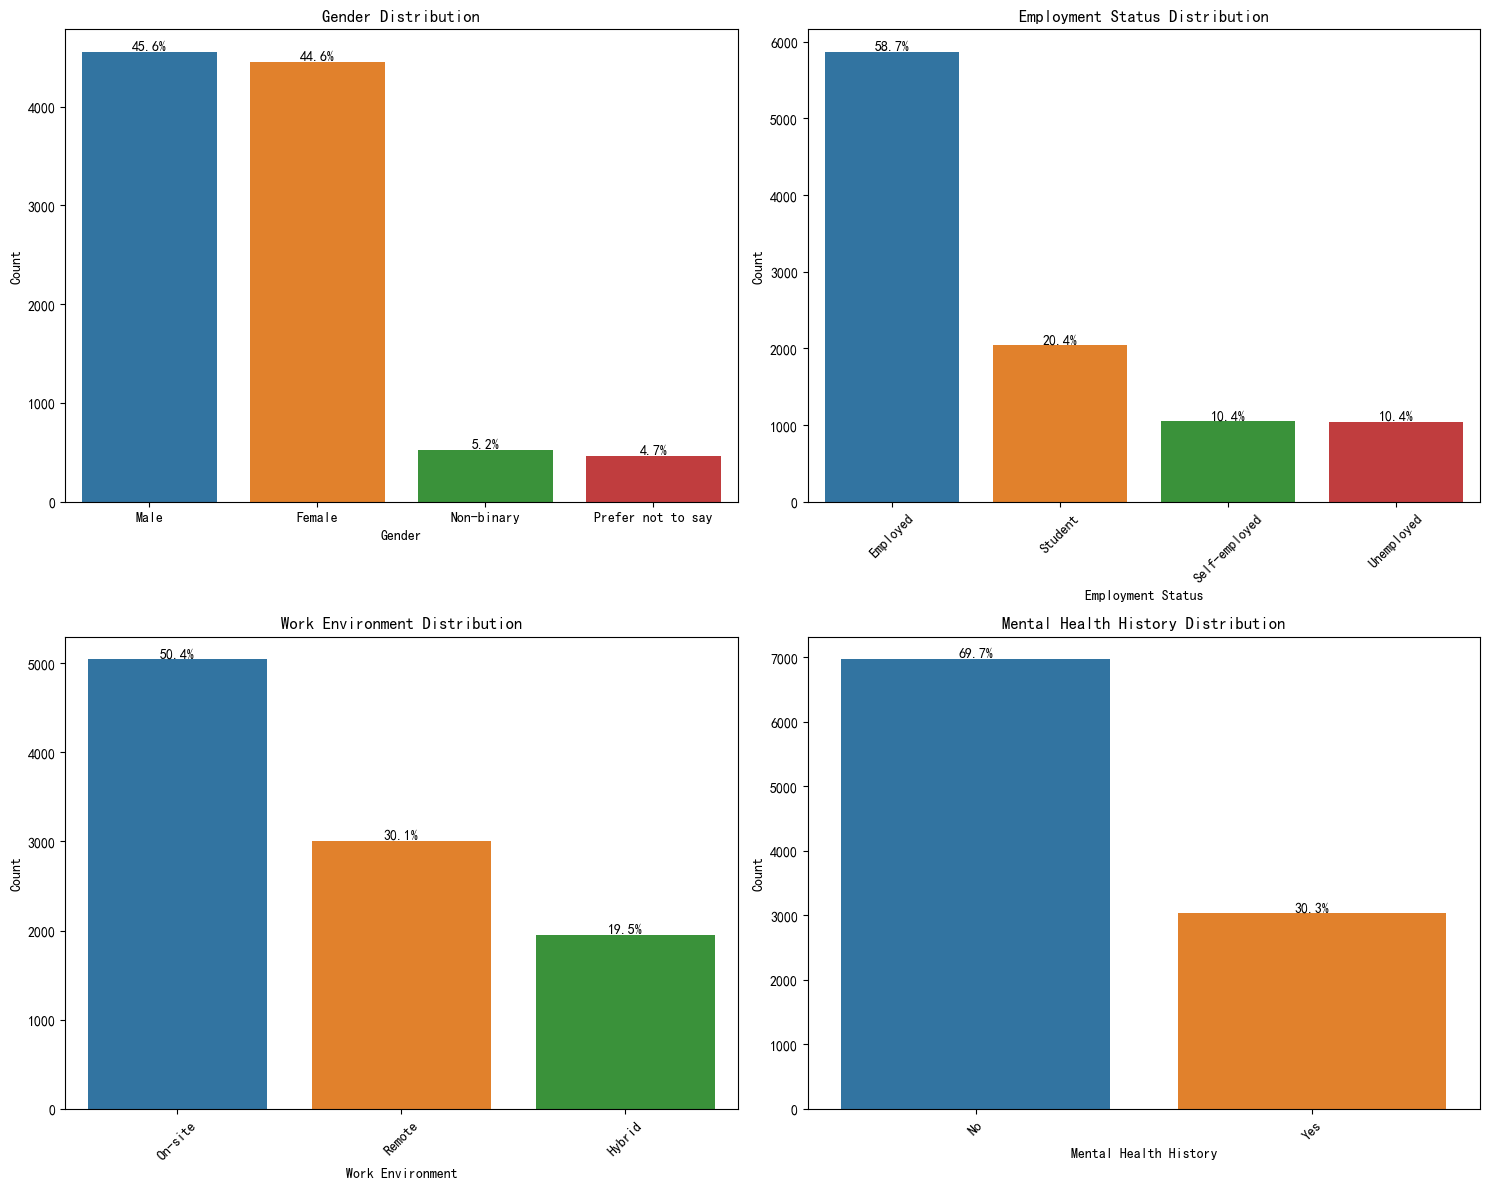


=== 详细统计信息 ===

1. Gender Distribution:
                   Count  Percentage(%)
Male                4557          45.57
Female              4457          44.57
Non-binary           520           5.20
Prefer not to say    466           4.66

2. Employment Status Distribution:
               Count  Percentage(%)
Employed        5868          58.68
Student         2043          20.43
Self-employed   1045          10.45
Unemployed      1044          10.44

3. Work Environment Distribution:
         Count  Percentage(%)
On-site   5044          50.44
Remote    3009          30.09
Hybrid    1947          19.47

4. Mental Health History Distribution:
     Count  Percentage(%)
No    6969          69.69
Yes   3031          30.31

=== 类别不平衡检查（比例<10%的类别）===

gender中的少数类别:
Non-binary           5.20
Prefer not to say    4.66
Name: gender, dtype: float64


In [12]:
# 输入变量分析
# 创建一个2x2的子图布局，分析四个主要的类别变量
plt.figure(figsize=(15, 12))

# 1. 性别分布分析 (gender)
plt.subplot(2, 2, 1)
gender_dist = df['gender'].value_counts()
gender_pct = df['gender'].value_counts(normalize=True) * 100
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in enumerate(gender_dist.values):
    plt.text(i, v, f'{gender_pct[i]:.1f}%', ha='center', va='bottom')

# 2. 就业状况分析 (employment_status)
plt.subplot(2, 2, 2)
emp_dist = df['employment_status'].value_counts()
emp_pct = df['employment_status'].value_counts(normalize=True) * 100
sns.barplot(x=emp_dist.index, y=emp_dist.values)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(emp_dist.values):
    plt.text(i, v, f'{emp_pct[i]:.1f}%', ha='center', va='bottom')

# 3. 工作环境分析 (work_environment)
plt.subplot(2, 2, 3)
work_dist = df['work_environment'].value_counts()
work_pct = df['work_environment'].value_counts(normalize=True) * 100
sns.barplot(x=work_dist.index, y=work_dist.values)
plt.title('Work Environment Distribution')
plt.xlabel('Work Environment')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(work_dist.values):
    plt.text(i, v, f'{work_pct[i]:.1f}%', ha='center', va='bottom')

# 4. 精神病史分析 (mental_health_history)
plt.subplot(2, 2, 4)
hist_dist = df['mental_health_history'].value_counts()
hist_pct = df['mental_health_history'].value_counts(normalize=True) * 100
sns.barplot(x=hist_dist.index, y=hist_dist.values)
plt.title('Mental Health History Distribution')
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(hist_dist.values):
    plt.text(i, v, f'{hist_pct[i]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 打印详细的统计信息
print("\n=== 详细统计信息 ===")

print("\n1. Gender Distribution:")
print(pd.DataFrame({
    'Count': gender_dist,
    'Percentage(%)': gender_pct
}))

print("\n2. Employment Status Distribution:")
print(pd.DataFrame({
    'Count': emp_dist,
    'Percentage(%)': emp_pct
}))

print("\n3. Work Environment Distribution:")
print(pd.DataFrame({
    'Count': work_dist,
    'Percentage(%)': work_pct
}))

print("\n4. Mental Health History Distribution:")
print(pd.DataFrame({
    'Count': hist_dist,
    'Percentage(%)': hist_pct
}))

# 检查各变量的不平衡情况
print("\n=== 类别不平衡检查（比例<10%的类别）===")
for var in ['gender', 'employment_status', 'work_environment', 'mental_health_history']:
    pct = df[var].value_counts(normalize=True) * 100
    imbalanced = pct[pct < 10]
    if not imbalanced.empty:
        print(f"\n{var}中的少数类别:")
        print(imbalanced)

根据统计数据，我来为您总结各个输入变量的分布情况：

1. **性别(Gender)分布分析**：
   - 性别分布总体呈现男女相对平衡的状态：男性(45.57%)和女性(44.57%)的比例接近
   - 存在明显的类别不平衡问题：非二元性别(5.20%)和不愿透露(4.66%)的样本比例较低（<10%）
   - 建议：在模型训练时需要注意对少数类别（非二元性别和不愿透露）进行特殊处理，如过采样或使用类别权重

2. **就业状况(Employment Status)分析**：
   - 就业人群（含自雇）占主导：正式就业(58.68%)和自雇(10.45%)共占约69%
   - 学生群体占比显著(20.43%)，是第二大类别
   - 失业人群占比10.44%
   - 总体分布相对合理，没有极度稀缺的类别（所有类别都≥10%）
   - 建议：数据分布相对均衡，可以直接用于建模，无需特殊处理

3. **工作环境(Work Environment)分析**：
   - 传统办公场所工作（On-site）仍是主流，占50.44%
   - 远程工作（Remote）占30.09%
   - 混合办公（Hybrid）占19.47%
   - 三种工作模式的分布相对合理，没有极端不平衡的情况
   - 建议：数据分布适中，可以直接用于建模分析

4. **总体结论和建议**：
   - 主要的数据不平衡问题集中在性别变量上
   - 就业状况和工作环境的分布相对合理，无需特殊处理
   - 建模策略建议：
     1. 对性别变量考虑使用以下处理方法：
        - SMOTE等过采样技术
        - 类别权重调整
        - 或考虑将少数类别合并
     2. 其他变量可以直接使用，无需特殊处理
     3. 在模型评估时，需要特别关注对性别少数群体的预测效果

这些发现对后续的特征工程和模型选择都有重要的指导意义。我们需要特别注意性别变量的处理方式，以确保模型不会忽视或偏见少数群体。
